# Data Exploration


### Import Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LassoCV,RidgeCV, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Loading data

In [56]:
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Data Profiling and Cleansing


Let’s get a summary of the dataset we have.



In [57]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [58]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [59]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43684,33802074,LARGE ROOM - FIT 2-3 GUESTS - SAFE & RENOVATED,73676969,Meezy,Bronx,Williamsbridge,40.87724,-73.85047,Private room,56,2,4,2019-06-20,3.24,3,70
12816,9785516,Beautiful Luxury Manhattan 3bed/2bath!,4094857,Anat,Manhattan,Upper West Side,40.79113,-73.96645,Entire home/apt,372,3,23,2018-12-30,0.54,1,17
48287,36180341,VIP Pristine Luxury 2BED Prime Midtown west,84749340,Pierre,Manhattan,Upper West Side,40.76836,-73.98419,Entire home/apt,245,1,0,NaN,NaN,1,287
37062,29461695,Large Private Room in Beautiful Brooklyn Apart...,97425,Lauren,Brooklyn,Bushwick,40.70137,-73.92442,Private room,70,2,10,2019-06-12,2.36,1,14
17121,13569725,Little slice of paradise on the Lower East Side,19417913,Cate,Manhattan,Chinatown,40.71661,-73.99144,Entire home/apt,150,3,7,2018-03-12,0.19,1,11
17606,13847278,Spacious and Comfy one large bedroom in Upper ...,81752328,Deepti,Manhattan,Upper East Side,40.76927,-73.94900,Entire home/apt,130,7,25,2019-06-29,0.92,1,0
1372,602888,Bright UES Gem Near Central Park,177724,Lauren,Manhattan,Upper East Side,40.76985,-73.95815,Entire home/apt,200,2,17,2015-12-07,0.21,1,0
45945,35005499,Cozy Corner next to the Empire State Building,263712096,Nacho,Manhattan,Midtown,40.74673,-73.98305,Shared room,60,1,0,NaN,NaN,3,43
14851,11771598,Quiet and Sunny room in Harlem!,36830075,Camila,Manhattan,Harlem,40.82884,-73.94868,Private room,50,1,0,NaN,NaN,2,0
2243,1061337,Sunny Private BR Crown Hts Brooklyn,1557383,Candace,Brooklyn,Crown Heights,40.67418,-73.94661,Private room,70,1,4,2017-08-01,0.06,1,0


In [60]:
# information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [61]:
# show number of rows and columns

df.shape

(48895, 16)

In [62]:
# show columns

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#### Rename Colmun

In [63]:
df.rename(columns={
'neighbourhood_group': 'city'
}, inplace=True)
df

,id,name,host_id,host_name,city,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### Check if there are missing values and sum them


In [64]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
city                                  0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 4 columns contain a missing value. name,host_name and reviews_per_month is not necessary for analysis,so we can drop it. last_review is date,this variable is also insignificant. we can drop this as well.

#### Now, we drop unnecessary columns


In [65]:
df.drop(['id', 'name', 'host_name', 'host_id', 'neighbourhood','number_of_reviews','reviews_per_month','last_review','calculated_host_listings_count'], axis=1, inplace=True )

In [66]:
df.drop([], axis=1, inplace=True )

#### show after droping null data

In [67]:
df.isna().sum()

city                0
latitude            0
longitude           0
room_type           0
price               0
minimum_nights      0
availability_365    0
dtype: int64

#### Checking if we have duplicated  and remove it

In [68]:
df.duplicated().sum()

0

In [69]:
df= df.drop_duplicates()

In [70]:
df.duplicated().sum()

0

#### Check statics of the dataset


In [71]:
df.describe()

,latitude,longitude,price,minimum_nights,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,112.781327
std,0.054530,0.046157,240.154170,20.510550,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,365.000000


In [72]:
df.shape

(48895, 7)

In [73]:
#show data types

df.dtypes

city                 object
latitude            float64
longitude           float64
room_type            object
price                 int64
minimum_nights        int64
availability_365      int64
dtype: object

By now, we've handled missing and NaN values, dropped insignificant columns, the next step is to dive deeper into the dataset to search for more interesting facts.

# Data Visualization

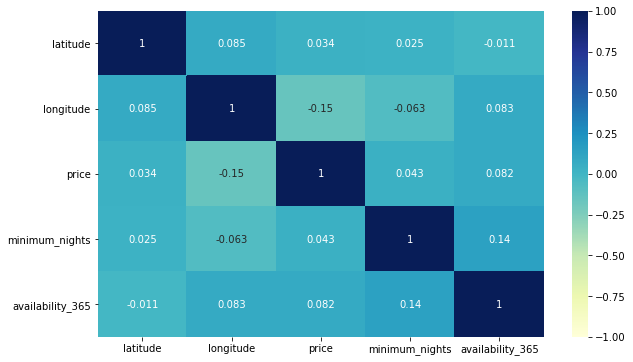

In [74]:
correlation = df.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation,linewidths=0, vmin=-1,annot=True, cmap="YlGnBu")

Here we are ploting a correlation matrix see how all the variables correlate with each other .

In [75]:
#name of the city
df.city.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [76]:
len(df.city.unique())

5

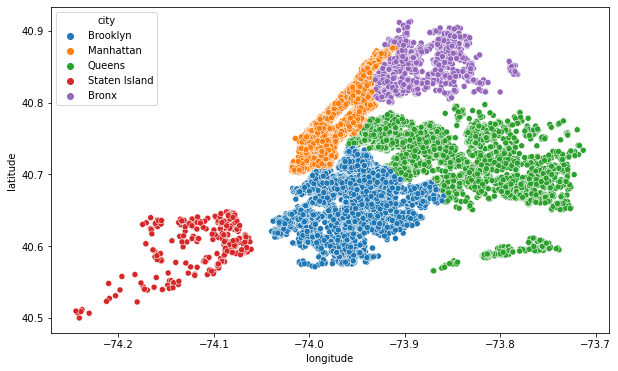

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.city);

The above plot just decibes the demogrphic view of the entries in the data and also provides a clear view of the City.

#### count of room types in each city

In [78]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [80]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [81]:
city_room_type = df.groupby(['city'])['room_type'].value_counts().unstack(0)
print(city_room_type)

city             Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                         
Entire home/apt    379      9559      13199    2096            176
Private room       652     10132       7982    3372            188
Shared room         60       413        480     198              9


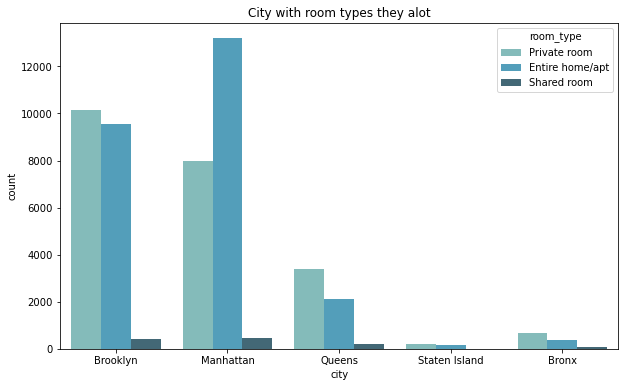

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='city',hue='room_type',palette='GnBu_d')
plt.title('City with room types they alot')
plt.show()

We see above that the highest room types in (Manhattan) represents Entire home/apt and the lowest room types in (Staten island) represents Shared room.

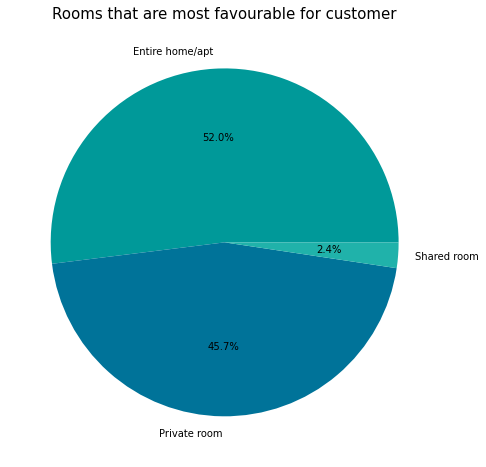

In [82]:
#The rooms that customers choose the most
labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'] )
plt.title("Rooms that are most favourable for customer", color = 'black',fontsize = 15);

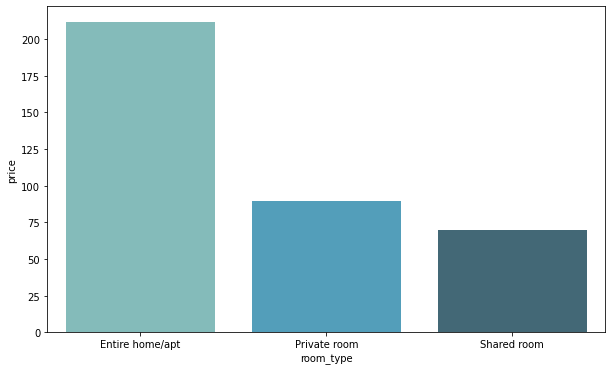

In [83]:
##mean price for room type
rtype = df.groupby('room_type', as_index=False)[['price']].mean()

plt.figure(figsize=(10,6))
sns.barplot(data=rtype, x=rtype['room_type'], y=rtype['price'], palette='GnBu_d');

The above bar plot we see:

1- The price of entire home/apt is more than any other room type.

2- Shared room is the cheapest.

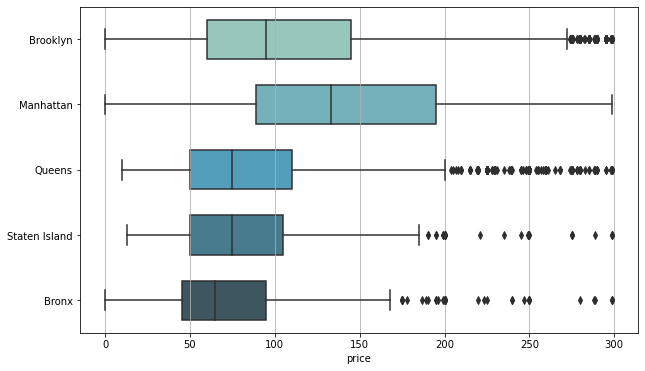

In [36]:
#city with price
f, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df[df['price']<300],y='city',x='price',width=.6,palette='GnBu_d')
#sns.stripplot(data=airbnb[airbnb['price']<300],y="neighbourhood_group", x="price", size=2, color=".4", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="");


We see above that prices are generally high in Manhattan more than any other city.

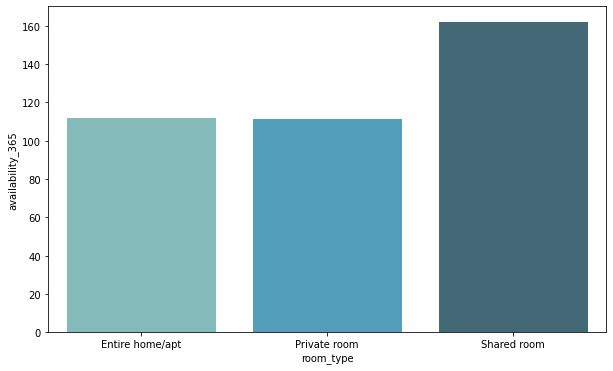

In [84]:
# Airbnb dataset groupby room_type with 'availability_365'-mean
ngroup = df.groupby('room_type', as_index=False)[['availability_365']].mean()

plt.figure(figsize=(10,6))
sns.barplot(data=ngroup, x=ngroup['room_type'], y=ngroup['availability_365'], palette='GnBu_d');

Above Here we see that the shared rooms are the most available all year round.



#### What is the distribution of minimum_nights?


C:\Users\samia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


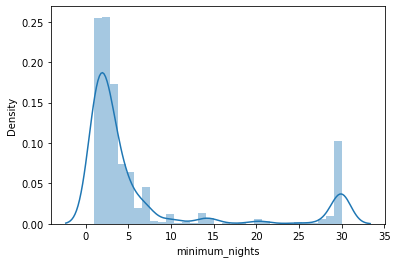

In [32]:
#Nights Booked
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

Seems that most hosts give less than 10 days for the minimum nights for booking a room, and 1 month is a popular one as well.

*At the end of this analysis, we see that most customers do not prefer shared rooms, so the prices of entire home and private rooms are higher than shared rooms, because the people choose it more.*